In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from __future__ import division
import csv
import math
import powerlaw
from numpy import genfromtxt
import random
import pandas as pd

In [6]:
import pandas as pd


railonly_file_path = 'railonly.csv'
data = pd.read_csv(railonly_file_path)


filtered_data = data[data['dms_mode'] == 'Rail']

# Prepare the edges data
edges = filtered_data[['dms_orig_string', 'dms_dest_string', 'distance_miles']].copy()
edges['Id'] = range(1, len(edges) + 1)

# Prepare the nodes data
nodes = pd.concat([filtered_data[['dms_orig_string']], filtered_data[['dms_dest_string']]], ignore_index=True)
nodes = nodes.drop_duplicates().reset_index(drop=True)


Calculating best minimal value for power law fit


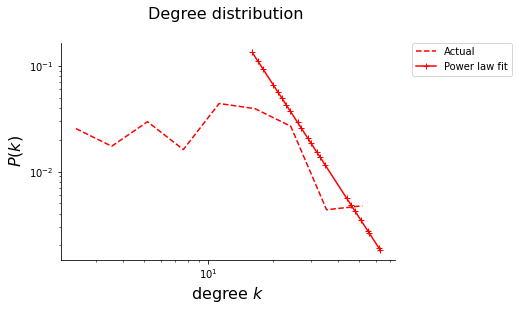

In [7]:

edges_file_path = 'railonly.csv'  # Replace with the path to your filtered edges file
edges = pd.read_csv(edges_file_path)

# NetworkX
G = nx.Graph()
edges_array = edges[['dms_orig_string', 'dms_dest_string', 'distance_miles']].values
G.add_weighted_edges_from(edges_array)

#Compute the degree distribution
degrees1 = [d for n, d in G.degree()]
kmin = min(degrees1)
kmax = max(degrees1)

# Fit the degree distribution to a power law
fit1 = powerlaw.Fit(degrees1)
gamma1 = fit1.power_law.alpha

# Calculate the histogram for the degree distribution
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
density1, bins = np.histogram(degrees1, bins=bin_edges, density=True)


fig1 = plt.figure(figsize=(6, 4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1]) / 2)
plt.loglog(x1, density1, 'r--', label='Actual') 
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fit1.power_law.plot_pdf(ax=ax, label='Power law fit', color='r', marker='+')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Degree distribution \n', fontsize=16)
plt.show()


In [8]:
pip install pandas networkx

Note: you may need to restart the kernel to use updated packages.


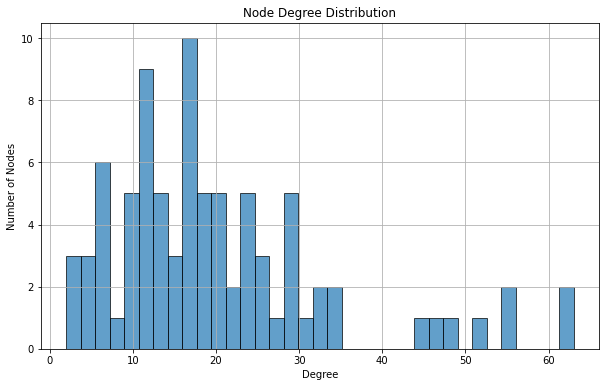

In [11]:

edges_file_path = 'railonly.csv'  # Replace with the path to your filtered edges file
edges = pd.read_csv(edges_file_path)

# Construct the graph using NetworkX
G = nx.Graph()
edges_array = edges[['dms_orig_string', 'dms_dest_string', 'distance_miles']].values
G.add_weighted_edges_from(edges_array)

# Calculate the degrees of each node
node_degrees = dict(G.degree())

# Prepare the nodes data
orig_nodes = edges[['dms_orig_string']].rename(columns={'dms_orig_string': 'Node'})
dest_nodes = edges[['dms_dest_string']].rename(columns={'dms_dest_string': 'Node'})
nodes = pd.concat([orig_nodes, dest_nodes], ignore_index=True).drop_duplicates().reset_index(drop=True)

# Add degree information to nodes
degree_airport = nodes['Node'].map(node_degrees).fillna(0)
degree_airport_t = np.array(degree_airport).reshape(-1, 1)

# Prepare the update array
nodes_t = np.array(nodes).reshape(-1, 1)
update = np.hstack((nodes_t, degree_airport_t))


df = pd.DataFrame(update, columns=['Node', 'Degree'])


save = 'yes'
if save == 'yes':
    df.to_csv('update.csv', header=True, index=False, sep=',')

# Plot the node degrees
plt.figure(figsize=(10, 6))
plt.hist(degree_airport, bins=35, edgecolor='black', alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Node Degree Distribution')
plt.grid(True)
plt.show()


In [12]:
#average degree
averagedegree=G.size()*2/len(G)
print ("average degree: ",averagedegree)
#G.nodes()

average degree:  20.19047619047619


In [13]:
#average clustering
cluster1=nx.average_clustering(G)
print ("average clustering coeff: ", cluster1)

average clustering coeff:  0.5318624303119969


In [14]:
#diameter of the Graph
diameter=nx.diameter(G)
print ("diameter of the graph :",diameter )

diameter of the graph : 4


In [15]:
#average shortest path length
path_len_av=nx.average_shortest_path_length(G)
print ("average shortest path length: ", path_len_av)

average shortest path length:  1.8519793459552496


In [16]:
#degrees robustness
def degree_robust(C):
    C=G.copy()
    Gc_d=[]
    for i in range(0,len(C)):
        deg=pd.Series(C.degree())
        gc = max(nx.connected_component_subgraphs(C), key=len)
        Gc_d.append(len(gc))
        #removal
        deg.sort(ascending=False)
        target=deg.index[0] #this is the index of the node that has to be removed
        C.remove_node(target)
    return Gc_d

In [17]:
#degrees robustness
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(0, len(G)):
        node_deg = list(G.degree().items())
        gc = max(nx.connected_component_subgraphs(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

Degree robustness (size of largest connected component after each removal): [84, 83, 82, 81, 80, 79, 78, 76, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 44, 43, 38, 32, 26, 19, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Nodes removed in order: ['Houston TX', 'Iowa', 'Chicago IL-IN-WI (IL Part)', 'Los Angeles CA', 'Baton Rouge LA', 'New Orleans LA-MS (LA Part)', 'Wyoming', 'Atlanta GA', 'Detroit MI', 'Fort Wayne IN', 'Cleveland OH', 'Minneapolis-St. Paul MN-WI (MN Part)', 'Beaumont TX', 'San Francisco CA', 'Philadelphia PA-NJ-DE-MD (PA Part)', 'Portland OR-WA (OR Part)', 'Tampa FL', 'Philadelphia PA-NJ-DE-MD (NJ Part)', 'Indianapolis IN', 'Baltimore MD', 'Salt Lake City UT', 'Chicago IL-IN-WI (IN Part)', 'Columbus OH', 'Birmingham AL', 'New York NY-NJ-CT-PA (NY Part)', 'Charleston SC', 'Memphis TN-MS-AR (TN Part)', 'New York NY-NJ-CT-PA (

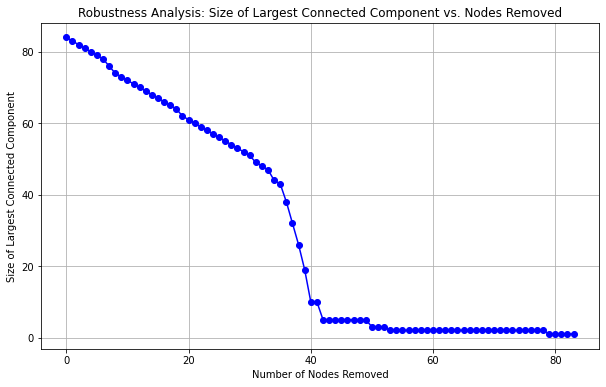

In [18]:
# Degree robustness function
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

# Execute degree robustness analysis
Gc_d, removed = degree_robust_remove(G)

print("Degree robustness (size of largest connected component after each removal):", Gc_d)
print("Nodes removed in order:", removed)


plt.figure(figsize=(10, 6))
plt.plot(Gc_d, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed')
plt.grid(True)
plt.show()

Degree robustness (size of largest connected component after each removal): [84, 83, 82, 81, 80, 79, 78, 76, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 44, 43, 38, 32, 26, 19, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Nodes removed in order: ['Houston TX', 'Iowa', 'Chicago IL-IN-WI (IL Part)', 'Los Angeles CA', 'Baton Rouge LA', 'New Orleans LA-MS (LA Part)', 'Wyoming', 'Atlanta GA', 'Detroit MI', 'Fort Wayne IN', 'Cleveland OH', 'Minneapolis-St. Paul MN-WI (MN Part)', 'Beaumont TX', 'San Francisco CA', 'Philadelphia PA-NJ-DE-MD (PA Part)', 'Portland OR-WA (OR Part)', 'Tampa FL', 'Philadelphia PA-NJ-DE-MD (NJ Part)', 'Indianapolis IN', 'Baltimore MD', 'Salt Lake City UT', 'Chicago IL-IN-WI (IN Part)', 'Columbus OH', 'Birmingham AL', 'New York NY-NJ-CT-PA (NY Part)', 'Charleston SC', 'Memphis TN-MS-AR (TN Part)', 'New York NY-NJ-CT-PA (

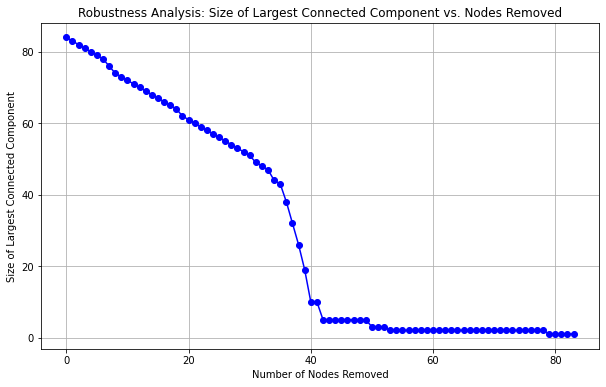

Random removal robustness (size of largest connected component after each removal): [84, 83, 82, 81, 80, 79, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 25, 24, 23, 22, 20, 19, 18, 16, 15, 15, 14, 14, 13, 12, 11, 10, 9, 8, 7, 6, 4, 3, 1, 1, 1, 1]


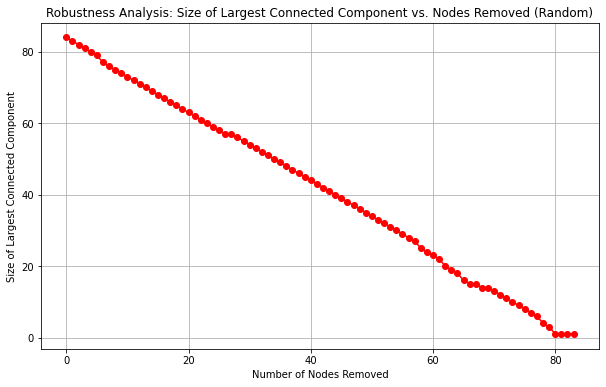

In [19]:
# Construct the graph using NetworkX
G = nx.Graph()
edges_array = edges[['dms_orig_string', 'dms_dest_string', 'distance_miles']].values
G.add_weighted_edges_from(edges_array)

# Degree robustness function
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

# Execute degree robustness analysis
Gc_d, removed = degree_robust_remove(G)

print("Degree robustness (size of largest connected component after each removal):", Gc_d)
print("Nodes removed in order:", removed)

# Plot the robustness analysis for targeted attacks
plt.figure(figsize=(10, 6))
plt.plot(Gc_d, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed')
plt.grid(True)
plt.show()

# Random removal robustness function
def degree_robust_rand(G):
    G = G.copy()
    Gc_dr = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_dr.append(len(gc))
        # Random removal
        target = random.choice(list(G.nodes()))
        G.remove_node(target)
    return Gc_dr

# Execute random robustness analysis
Gc_dr = degree_robust_rand(G)

print("Random removal robustness (size of largest connected component after each removal):", Gc_dr)

# Plot the robustness analysis for random attacks
plt.figure(figsize=(10, 6))
plt.plot(Gc_dr, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed (Random)')
plt.grid(True)
plt.show()


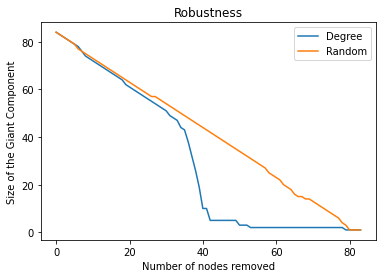

In [21]:
#ploting the robustness graph for targeted  and random attack based on degree
plt.plot(Gc_d, label="Degree") 
plt.plot(Gc_dr, label="Random") 
plt.xlabel("Number of nodes removed") 
plt.ylabel("Size of the Giant Component")
plt.title("Robustness") 
plt.legend()

In [22]:
#degree preserving ramdomization
G_pre=G.copy()
G_preserving=nx.double_edge_swap(G_pre, nswap=1, max_tries=100)

In [25]:
#doing robustness analysis for degree preserving randomizations
#Gc_pre=degree_robust(G_preserving)

NameError: name 'Gc_pre' is not defined

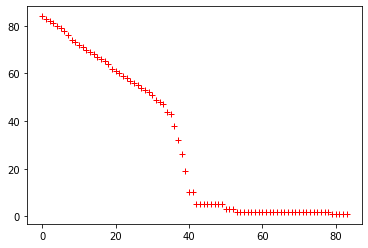

In [26]:
#ploting the robustness graph for targeted  and random attack based on degree
plt.plot(Gc_d, 'r+', label="Actual") 
plt.plot(Gc_pre, 'b--', label="Random") 
plt.xlabel("Number of nodes removed") 
plt.ylabel("Size of the Giant Component")
plt.title("Robustness for a rail Network-Degree preserving randomization") 
plt.legend()

Degree robustness (size of largest connected component after each removal): [84, 83, 82, 81, 80, 79, 78, 76, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 44, 43, 38, 32, 26, 19, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Nodes removed in order: ['Houston TX', 'Iowa', 'Chicago IL-IN-WI (IL Part)', 'Los Angeles CA', 'Baton Rouge LA', 'New Orleans LA-MS (LA Part)', 'Wyoming', 'Atlanta GA', 'Detroit MI', 'Fort Wayne IN', 'Cleveland OH', 'Minneapolis-St. Paul MN-WI (MN Part)', 'Beaumont TX', 'San Francisco CA', 'Philadelphia PA-NJ-DE-MD (PA Part)', 'Portland OR-WA (OR Part)', 'Tampa FL', 'Philadelphia PA-NJ-DE-MD (NJ Part)', 'Indianapolis IN', 'Baltimore MD', 'Salt Lake City UT', 'Chicago IL-IN-WI (IN Part)', 'Columbus OH', 'Birmingham AL', 'New York NY-NJ-CT-PA (NY Part)', 'Charleston SC', 'Memphis TN-MS-AR (TN Part)', 'New York NY-NJ-CT-PA (

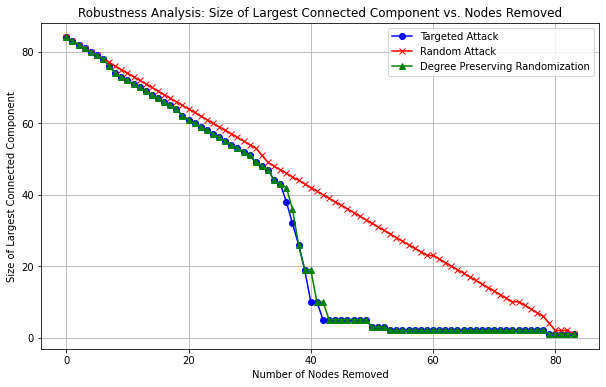

In [31]:
# Construct the graph using NetworkX
G = nx.Graph()
edges_array = edges[['dms_orig_string', 'dms_dest_string', 'distance_miles']].values
G.add_weighted_edges_from(edges_array)

# Degree robustness function
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

# Random removal robustness function
def degree_robust_rand(G):
    G = G.copy()
    Gc_dr = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_dr.append(len(gc))
        # Random removal
        target = random.choice(list(G.nodes()))
        G.remove_node(target)
    return Gc_dr

# Degree preserving randomization and robustness analysis
def degree_preserving_randomization_robustness(G):
    G_pre = G.copy()
    G_preserving = nx.double_edge_swap(G_pre, nswap=1, max_tries=100)
    Gc_pre, _ = degree_robust_remove(G_preserving)
    return Gc_pre

# Execute degree robustness analysis
Gc_d, removed = degree_robust_remove(G)
print("Degree robustness (size of largest connected component after each removal):", Gc_d)
print("Nodes removed in order:", removed)

# Execute random robustness analysis
Gc_dr = degree_robust_rand(G)
print("Random removal robustness (size of largest connected component after each removal):", Gc_dr)

# Execute degree preserving randomization robustness analysis
Gc_pre = degree_preserving_randomization_robustness(G)
print("Degree preserving randomization robustness (size of largest connected component after each removal):", Gc_pre)

# Plot the robustness analysis for targeted attacks
plt.figure(figsize=(10, 6))
plt.plot(Gc_d, marker='o', linestyle='-', color='b', label='Targeted Attack')
plt.plot(Gc_dr, marker='x', linestyle='-', color='r', label='Random Attack')
plt.plot(Gc_pre, marker='^', linestyle='-', color='g', label='Degree Preserving Randomization')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
df_heatwave = pd.read_csv("hot_days_per_year.csv")
df_heatwave_select = df_heatwave[["dms_orig_string","hot_days_change3_py"]]

# Sort the DataFrame in descending order based on 'hot_days_change_py'
df_heatwave_select_sorted = df_heatwave_select.sort_values(by='hot_days_change3_py', ascending=False)

# Reset index (optional)
df_heatwave_select_sorted = df_heatwave_select_sorted.reset_index(drop=True)

# Display the sorted DataFrame
print(df_heatwave_select_sorted)

                 dms_orig_string  hot_days_change3_py
0              Corpus Christi TX             3.823246
1                      Laredo TX             3.823246
2                      Austin TX             3.625731
3                 San Antonio TX             3.625731
4                     New Mexico             2.488816
..                           ...                  ...
77  Boston MA-RI-NH-CT (RI Part)             0.012500
78  Boston MA-RI-NH-CT (MA Part)             0.012500
79              San Francisco CA             0.000000
80      Portland OR-WA (OR Part)             0.000000
81      Portland OR-WA (WA Part)             0.000000

[82 rows x 2 columns]


In [69]:
for node_hw in df_heatwave_select_sorted['dms_orig_string'] :
    print (node_hw)

Corpus Christi TX
Laredo TX
Austin TX
San Antonio TX
New Mexico
Omaha NE-IA (NE Part)
Kansas City MO-KS (MO Part)
Kansas City MO-KS (KS Part)
Indianapolis IN
Houston TX
Iowa
St. Louis MO-IL (MO Part)
St. Louis MO-IL (IL Part)
Salt Lake City UT
Tulsa OK
El Paso TX-NM (TX Part)
Memphis TN-MS-AR (TN Part)
Sacramento CA
Fresno CA
Tucson AZ
Birmingham AL
Nashville TN
Los Angeles CA
Oklahoma City OK
Wichita KS
Mobile AL
Fort Wayne IN
Dayton OH
Columbus OH
Cincinnati OH-KY-IN (KY Part)
Cincinnati OH-KY-IN (OH Part)
Denver CO
Phoenix AZ
Las Vegas NV-AZ (NV Part)
Minneapolis-St. Paul MN-WI (MN Part)
Wyoming
Grand Rapids MI
Detroit MI
Louisville KY-IN (KY Part)
Beaumont TX
Savannah GA
Milwaukee WI
Chicago IL-IN-WI (IL Part)
Chicago IL-IN-WI (IN Part)
Raleigh-Durham NC
Jacksonville FL-GA  CFS Area (FL Part)
Baton Rouge LA
Tampa FL
Orlando FL
Atlanta GA
Knoxville TN
Charlotte NC-SC (NC Part)
Greenville SC
Cleveland OH
Washington DC-VA-MD-WV (VA Part)
Washington DC-VA-MD-WV (MD Part)
Virginia Beach

In [70]:
G_test = G.copy()
Gc_d_hw = []
removed_hw = []
gc = max(nx.connected_components(G_test), key=len)
Gc_d_hw.append(len(gc))
for node_hw in df_heatwave_select_sorted['dms_orig_string'] :
    print (node_hw)
    try:
        print ("removed")
        G_test.remove_node(node_hw)
        removed_hw.append(node_hw)
        gc = max(nx.connected_components(G_test), key=len)
        Gc_d_hw.append(len(gc))
    except:
        pass
    
    

Corpus Christi TX
removed
Laredo TX
removed
Austin TX
removed
San Antonio TX
removed
New Mexico
removed
Omaha NE-IA (NE Part)
removed
Kansas City MO-KS (MO Part)
removed
Kansas City MO-KS (KS Part)
removed
Indianapolis IN
removed
Houston TX
removed
Iowa
removed
St. Louis MO-IL (MO Part)
removed
St. Louis MO-IL (IL Part)
removed
Salt Lake City UT
removed
Tulsa OK
removed
El Paso TX-NM (TX Part)
removed
Memphis TN-MS-AR (TN Part)
removed
Sacramento CA
removed
Fresno CA
removed
Tucson AZ
removed
Birmingham AL
removed
Nashville TN
removed
Los Angeles CA
removed
Oklahoma City OK
removed
Wichita KS
removed
Mobile AL
removed
Fort Wayne IN
removed
Dayton OH
removed
Columbus OH
removed
Cincinnati OH-KY-IN (KY Part)
removed
Cincinnati OH-KY-IN (OH Part)
removed
Denver CO
removed
Phoenix AZ
removed
Las Vegas NV-AZ (NV Part)
removed
Minneapolis-St. Paul MN-WI (MN Part)
removed
Wyoming
removed
Grand Rapids MI
removed
Detroit MI
removed
Louisville KY-IN (KY Part)
removed
Beaumont TX
removed
Savannah

In [71]:
removed_hw

['Corpus Christi TX',
 'Laredo TX',
 'Austin TX',
 'San Antonio TX',
 'New Mexico',
 'Omaha NE-IA (NE Part)',
 'Kansas City MO-KS (MO Part)',
 'Kansas City MO-KS (KS Part)',
 'Indianapolis IN',
 'Houston TX',
 'Iowa',
 'St. Louis MO-IL (MO Part)',
 'St. Louis MO-IL (IL Part)',
 'Salt Lake City UT',
 'Tulsa OK',
 'El Paso TX-NM (TX Part)',
 'Memphis TN-MS-AR (TN Part)',
 'Sacramento CA',
 'Fresno CA',
 'Tucson AZ',
 'Birmingham AL',
 'Nashville TN',
 'Los Angeles CA',
 'Oklahoma City OK',
 'Wichita KS',
 'Mobile AL',
 'Fort Wayne IN',
 'Dayton OH',
 'Columbus OH',
 'Cincinnati OH-KY-IN (KY Part)',
 'Cincinnati OH-KY-IN (OH Part)',
 'Denver CO',
 'Phoenix AZ',
 'Las Vegas NV-AZ (NV Part)',
 'Minneapolis-St. Paul MN-WI (MN Part)',
 'Wyoming',
 'Grand Rapids MI',
 'Detroit MI',
 'Louisville KY-IN (KY Part)',
 'Beaumont TX',
 'Savannah GA',
 'Milwaukee WI',
 'Chicago IL-IN-WI (IL Part)',
 'Chicago IL-IN-WI (IN Part)',
 'Raleigh-Durham NC',
 'Jacksonville FL-GA  CFS Area (FL Part)',
 'Baton 

In [72]:
removed

['Houston TX',
 'Iowa',
 'Chicago IL-IN-WI (IL Part)',
 'Los Angeles CA',
 'Baton Rouge LA',
 'New Orleans LA-MS (LA Part)',
 'Wyoming',
 'Atlanta GA',
 'Detroit MI',
 'Fort Wayne IN',
 'Cleveland OH',
 'Minneapolis-St. Paul MN-WI (MN Part)',
 'Beaumont TX',
 'San Francisco CA',
 'Philadelphia PA-NJ-DE-MD (PA Part)',
 'Portland OR-WA (OR Part)',
 'Tampa FL',
 'Philadelphia PA-NJ-DE-MD (NJ Part)',
 'Indianapolis IN',
 'Baltimore MD',
 'Salt Lake City UT',
 'Chicago IL-IN-WI (IN Part)',
 'Columbus OH',
 'Birmingham AL',
 'New York NY-NJ-CT-PA (NY Part)',
 'Charleston SC',
 'Memphis TN-MS-AR (TN Part)',
 'New York NY-NJ-CT-PA (NJ Part)',
 'Charlotte NC-SC (NC Part)',
 'Omaha NE-IA (NE Part)',
 'Pittsburgh PA-OH-WV (PA Part)',
 'St. Louis MO-IL (MO Part)',
 'Jacksonville FL-GA  CFS Area (FL Part)',
 'Nashville TN',
 'Richmond VA',
 'Albany NY  CFS Area',
 'Washington DC-VA-MD-WV (MD Part)',
 'Cincinnati OH-KY-IN (OH Part)',
 'Miami FL',
 'Denver CO',
 'New Mexico',
 'Sacramento CA',
 'Buff

In [73]:
# Degree robustness function
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

Degree robustness (size of largest connected component after each removal): [84, 83, 82, 81, 80, 79, 78, 76, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 44, 43, 38, 32, 26, 19, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Nodes removed in order: ['Houston TX', 'Iowa', 'Chicago IL-IN-WI (IL Part)', 'Los Angeles CA', 'Baton Rouge LA', 'New Orleans LA-MS (LA Part)', 'Wyoming', 'Atlanta GA', 'Detroit MI', 'Fort Wayne IN', 'Cleveland OH', 'Minneapolis-St. Paul MN-WI (MN Part)', 'Beaumont TX', 'San Francisco CA', 'Philadelphia PA-NJ-DE-MD (PA Part)', 'Portland OR-WA (OR Part)', 'Tampa FL', 'Philadelphia PA-NJ-DE-MD (NJ Part)', 'Indianapolis IN', 'Baltimore MD', 'Salt Lake City UT', 'Chicago IL-IN-WI (IN Part)', 'Columbus OH', 'Birmingham AL', 'New York NY-NJ-CT-PA (NY Part)', 'Charleston SC', 'Memphis TN-MS-AR (TN Part)', 'New York NY-NJ-CT-PA (

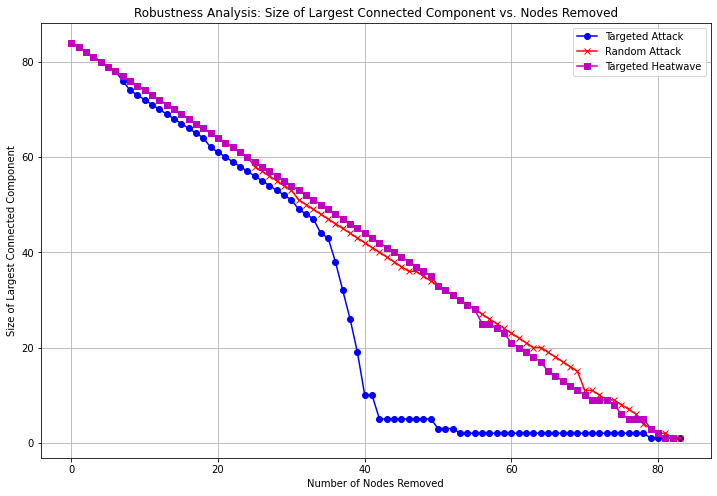

In [74]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load the filtered edges CSV file
edges_file_path = 'railonly.csv'
edges = pd.read_csv(edges_file_path)

# Construct the graph using NetworkX
G = nx.Graph()
edges_array = edges[['dms_orig_string', 'dms_dest_string', 'distance_miles']].values
G.add_weighted_edges_from(edges_array)

# Degree robustness function
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

# Random removal robustness function
def degree_robust_rand(G):
    G = G.copy()
    Gc_dr = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_dr.append(len(gc))
        # Random removal
        target = random.choice(list(G.nodes()))
        G.remove_node(target)
    return Gc_dr

# Degree preserving randomization and robustness analysis
def degree_preserving_randomization_robustness(G):
    G_pre = G.copy()
    G_preserving = nx.double_edge_swap(G_pre, nswap=1, max_tries=100)
    Gc_pre, _ = degree_robust_remove(G_preserving)
    return Gc_pre

# Execute degree robustness analysis
Gc_d, removed = degree_robust_remove(G)
print("Degree robustness (size of largest connected component after each removal):", Gc_d)
print("Nodes removed in order:", removed)

# Execute random robustness analysis
Gc_dr = degree_robust_rand(G)
print("Random removal robustness (size of largest connected component after each removal):", Gc_dr)

# Execute degree preserving randomization robustness analysis
Gc_pre = degree_preserving_randomization_robustness(G)
print("Degree preserving randomization robustness (size of largest connected component after each removal):", Gc_pre)

# New function to simulate the impact of removing "San Antonio TX"
def remove_node_and_analyze(G, node):
    G = G.copy()
    G.remove_node(node)
    Gc_sa = []
    for i in range(len(G)):
        gc = max(nx.connected_components(G), key=len)
        Gc_sa.append(len(gc))
        if len(gc) == 0:
            break
        G.remove_node(random.choice(list(gc)))
    return Gc_sa

# Analyze the impact of removing "San Antonio TX"
Gc_sa = remove_node_and_analyze(G, "San Antonio TX")

# Combined plot
plt.figure(figsize=(12, 8))
plt.plot(Gc_d, marker='o', linestyle='-', color='b', label='Targeted Attack')
plt.plot(Gc_dr, marker='x', linestyle='-', color='r', label='Random Attack')
#plt.plot(Gc_pre, marker='^', linestyle='-', color='g', label='Degree Preserving Randomization')
#plt.plot(Gc_sa, marker='s', linestyle='-', color='m', label='Removal of San Antonio TX(heat wave)')
plt.plot(Gc_d_hw, marker='s', linestyle='-', color='m', label='Targeted Heatwave')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
#generating GNM graph
G_gnm_c=G.copy()
G_gnm=nx.gnm_random_graph(len(G_gnm_c), G.number_of_edges(), seed=23, directed=False)
averagedegree_gnm=G_gnm.size()*2/len(G_gnm)
print ("average degree of GNM :", averagedegree_gnm)

average degree of GNM : 20.19047619047619


In [ ]:
G_gnm1=G_gnm.copy()
Gc_gnm_d=degree_robust(G_gnm1)

In [ ]:
def degree_preserving_randomization_robustness(G):
    G_pre = G.copy()
    G_preserving = nx.double_edge_swap(G_pre, nswap=1, max_tries=100)
    Gc_pre, _ = degree_robust_remove(G_preserving)
    return Gc_pre

# Execute degree robustness analysis
Gc_d, removed = degree_robust_remove(G)
print("Degree robustness (size of largest connected component after each removal):", Gc_d)
print("Nodes removed in order:", removed)

# Execute random robustness analysis
Gc_dr = degree_robust_rand(G)
print("Random removal robustness (size of largest connected component after each removal):", Gc_dr)

# Execute degree preserving randomization robustness analysis
Gc_pre = degree_preserving_randomization_robustness(G)
print("Degree preserving randomization robustness (size of largest connected component after each removal):", Gc_pre)

# Generating GNM random graph and robustness analysis
G_gnm = nx.gnm_random_graph(len(G), G.number_of_edges(), seed=23, directed=False)
averagedegree_gnm = G_gnm.size() * 2 / len(G_gnm)
print("Average degree of GNM:", averagedegree_gnm)
Gc_gnm_d, _ = degree_robust_remove(G_gnm)

# Plot the robustness analysis for targeted attacks
plt.figure(figsize=(10, 6))
plt.plot(Gc_d, marker='o', linestyle='-', color='b', label='Targeted Attack')
plt.plot(Gc_dr, marker='x', linestyle='-', color='r', label='Random Attack')
plt.plot(Gc_pre, marker='^', linestyle='-', color='g', label='Degree Preserving Randomization')
plt.plot(Gc_gnm_d, marker='s', linestyle='-', color='m', label='GNM Random Graph')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#ploting the robustness graph for targeted  and random attack based on degree
#plt.plot(Gc_gnm_d, label="Actual") 
plt.plot(Gc_gnm_d, label="Targert") 
plt.xlabel("Number of nodes removed") 
plt.ylabel("Size of the Giant Component")
plt.title("Robustness for an equivalent random GNM (keeping nodes and edges constant)") 
plt.legend()

In [ ]:
# Plotting degree distribution of GNM model

degrees_rand = [d for n, d in G_gnm.degree()]
kmin = min(degrees_rand)
kmax = max(degrees_rand)
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
density_rand, bins = np.histogram(degrees_rand, bins=bin_edges, density=True)

fig2 = plt.figure(figsize=(6, 4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1]) / 2)
plt.loglog(x1, density_rand, 'r', label='Computer generated')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Degree distribution \n', fontsize=16)
plt.show()


In [ ]:
degrees_rand= list(G_gnm.degree().values())
kmin = min(degrees_rand)
kmax = max(degrees_rand)
bin_edges = np.linspace(kmin,kmax, num=50)
density_rand, bins = np.histogram(degrees_rand, bins=bin_edges, density=True)
fig2 = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x1, density_rand, 'r--', label='Computer generated') 
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#fit1.power_law.plot_pdf(ax=ax, label='Power law fit',color='r', marker='+')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Degree distribution \n',fontsize=16)
plt.show()


#degree_airport_gnm

In [ ]:
# Calculating clustering distribution
P = G.copy()
cls = []
deg_cl = []

for node in P.nodes():
    a = nx.clustering(P, nodes=node, weight=None)
    cls.append(a)
    d = P.degree(node)
    deg_cl.append(d)

plt.figure(figsize=(10, 6))
plt.scatter(deg_cl, cls)
plt.xlabel("Degree") 
plt.ylabel("Clustering Coefficient")
plt.title("C(k)")
plt.grid(True)
plt.show()

In [ ]:
#calculating clustering distribution of random graph
Crand=G_gnm.copy()
cls=[]
deg_cl=[]

for i in range(0,len(Crand)):
    a=nx.clustering(Crand,nodes= i,weight=None)
    cls.append(a)
    d=Crand.degree(i)
    deg_cl.append(d)

plt.scatter(deg_cl, cls)
plt.xlabel("Degree") 
plt.ylabel("Clustering Coefficient")
plt.title("C(k) - Random GNM model") 
#plt.legend()

In [ ]:
# Calculating clustering distribution of random graph
Crand = G_gnm.copy()
cls_rand = []
deg_cl_rand = []

for node in Crand.nodes():
    a = nx.clustering(Crand, nodes=node, weight=None)
    cls_rand.append(a)
    d = Crand.degree(node)
    deg_cl_rand.append(d)

plt.figure(figsize=(10, 6))
plt.scatter(deg_cl_rand, cls_rand)
plt.xlabel("Degree") 
plt.ylabel("Clustering Coefficient")
plt.title("C(k) - Random GNM model")
plt.grid(True)
plt.show()


#making the refined Graph
remove_nodes = genfromtxt('cn_remove_nodes.csv', delimiter=',',dtype=str)

In [ ]:
#making the refined Graph 
remove_nodes = genfromtxt('cn_remove_nodes.csv', delimiter=',',dtype=str)
rem_nodes=remove_nodes[1:]

In [ ]:
Ref_G=G.copy()
Ref_G.remove_nodes_from(remove_nodes)
print (len(Ref_G))    
Ref_G.size()

In [ ]:
nx.write_edgelist(Ref_G, "edgelist2.txt", data=['weight'])

In [ ]:
#[G.degree(node) for node in nodes]

In [ ]:
#Weight distribution
weight_new = [int(x) for x in weight]

#copying in the same code
degrees1 = list(weight_new)
kmin = min(degrees1)
kmax = max(degrees1)
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
density1, bins = np.histogram(degrees1, bins=bin_edges, density=True)
fig1 = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x1, density1, 'r--', label='Actual') 
plt.xlabel(r"weight $k$", fontsize=16)
plt.ylabel(r"$P(w)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#fit1.power_law.plot_pdf(ax=ax, label='Power law fit',color='r', marker='+')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Weight distribution \n',fontsize=16)
plt.show()